In [1]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
(X_Train,_),(_,_) = mnist.load_data()  

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_Train.shape)
print(type(X_Train))

X_Train = X_Train.reshape((*(X_Train.shape),1))
print(X_Train.shape)

(60000, 28, 28)
<class 'numpy.ndarray'>
(60000, 28, 28, 1)


In [4]:
#Normalize the Data between -1 and 1

X_Train = (X_Train.astype('float32') - 127.5)/127.5

print(np.min(X_Train))
print(np.max(X_Train))

-1.0
1.0


In [5]:
NUM_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(X_Train.shape[0]/float(BATCH_SIZE))
HALF_BATCH_SIZE = int(BATCH_SIZE/2)

NOISE_DIM = 100

adam = Adam(lr=2e-4,beta_1=0.5)

In [6]:
#Upsampling 
# Start from 7 X 7 X 128
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#Double the Activation Size 14 X 14 X 64
generator.add(UpSampling2D())
generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double the Activation Size 28 X 28 X 1
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', activation='tanh'))

# Final Output (No ReLu or Batch Norm)
generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()



#Discriminator - Downsampling
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

# Prefer Strided Convolutions over MaxPooling
discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))


discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0

In [7]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

def save_imgs(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()
  


In [8]:
!mkdir images

In [9]:
X_Train.shape

(60000, 28, 28, 1)

Epoch 1 D loss: 96.392362 G loss: 97.482744
Epoch 2 D loss: 175.145920 G loss: 198.068247
Epoch 3 D loss: 164.246756 G loss: 205.621547
Epoch 4 D loss: 163.605992 G loss: 199.875848
Epoch 5 D loss: 164.229890 G loss: 194.517803
Epoch 6 D loss: 163.511661 G loss: 193.948738
Epoch 7 D loss: 162.970072 G loss: 193.507197
Epoch 8 D loss: 162.579593 G loss: 194.611348
Epoch 9 D loss: 162.374046 G loss: 194.019729
Epoch 10 D loss: 162.136848 G loss: 194.343792


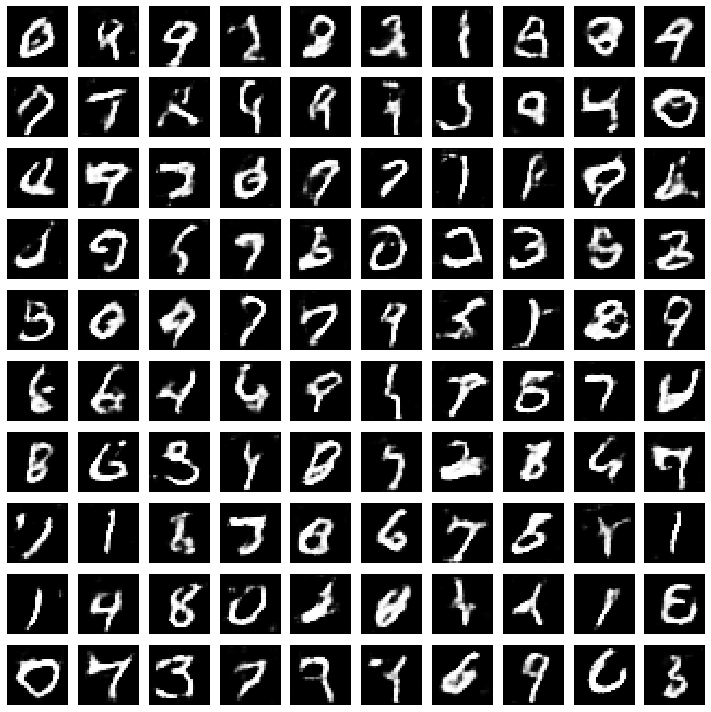

Epoch 11 D loss: 162.007415 G loss: 194.404791
Epoch 12 D loss: 161.773105 G loss: 194.507381
Epoch 13 D loss: 161.706064 G loss: 194.287017
Epoch 14 D loss: 161.456346 G loss: 195.352139
Epoch 15 D loss: 161.450430 G loss: 193.530113
Epoch 16 D loss: 161.362071 G loss: 194.518639
Epoch 17 D loss: 160.984558 G loss: 197.631307
Epoch 18 D loss: 161.086906 G loss: 194.652106
Epoch 19 D loss: 160.983437 G loss: 195.064521
Epoch 20 D loss: 160.418823 G loss: 201.709836


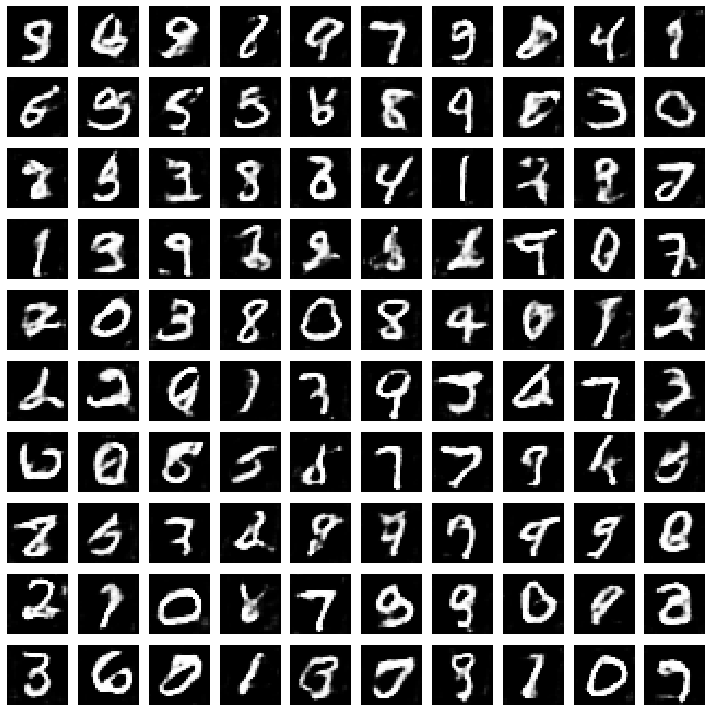

Epoch 21 D loss: 160.728655 G loss: 195.499246
Epoch 22 D loss: 160.608629 G loss: 196.279902
Epoch 23 D loss: 160.227588 G loss: 199.937170
Epoch 24 D loss: 159.935140 G loss: 201.012319
Epoch 25 D loss: 160.193063 G loss: 197.533494
Epoch 26 D loss: 160.015627 G loss: 198.503646
Epoch 27 D loss: 159.860303 G loss: 199.371008
Epoch 28 D loss: 159.420739 G loss: 204.991887
Epoch 29 D loss: 159.354429 G loss: 200.826243
Epoch 30 D loss: 159.294411 G loss: 201.144208


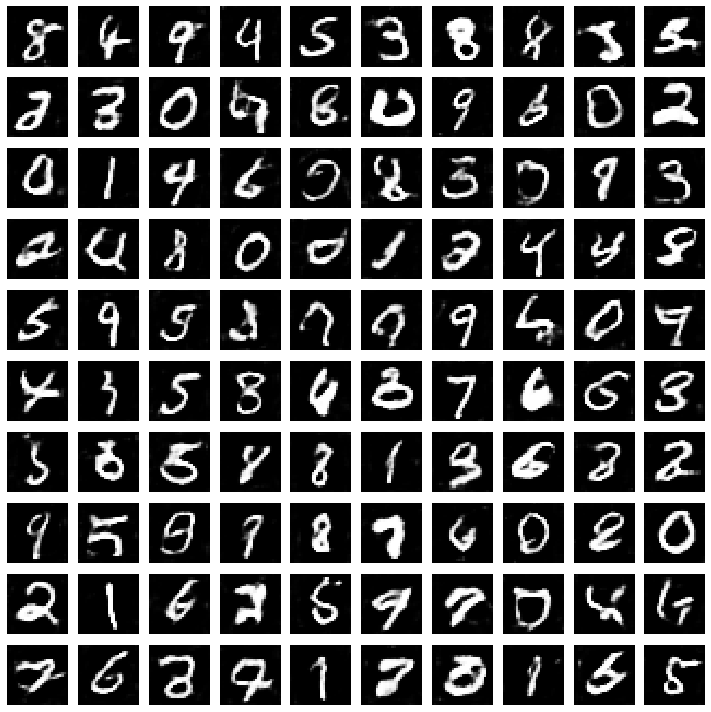

Epoch 31 D loss: 159.292366 G loss: 202.022380
Epoch 32 D loss: 158.495196 G loss: 208.626261
Epoch 33 D loss: 158.762144 G loss: 203.126115
Epoch 34 D loss: 158.582579 G loss: 204.064987
Epoch 35 D loss: 158.493551 G loss: 205.779105
Epoch 36 D loss: 158.308600 G loss: 205.936236
Epoch 37 D loss: 158.094513 G loss: 207.100303
Epoch 38 D loss: 157.858309 G loss: 207.523725
Epoch 39 D loss: 157.719592 G loss: 208.420459
Epoch 40 D loss: 157.480231 G loss: 209.751996


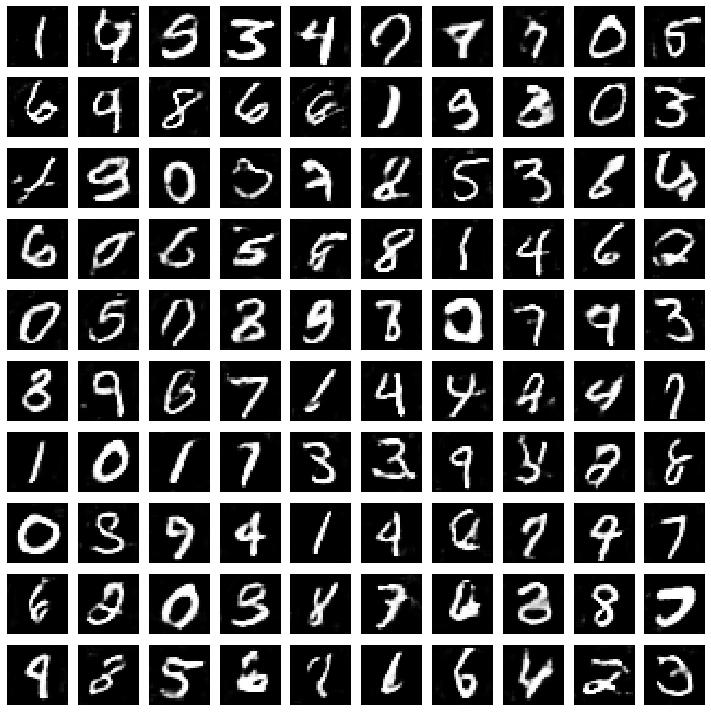

Epoch 41 D loss: 157.291697 G loss: 210.452853
Epoch 42 D loss: 157.065573 G loss: 210.671489
Epoch 43 D loss: 156.719505 G loss: 213.964521
Epoch 44 D loss: 156.711639 G loss: 212.959716
Epoch 45 D loss: 156.481466 G loss: 213.651384
Epoch 46 D loss: 156.187827 G loss: 215.645836
Epoch 47 D loss: 155.926829 G loss: 216.454542
Epoch 48 D loss: 155.862360 G loss: 217.371629
Epoch 49 D loss: 155.588811 G loss: 218.924498
Epoch 50 D loss: 155.230724 G loss: 219.249548


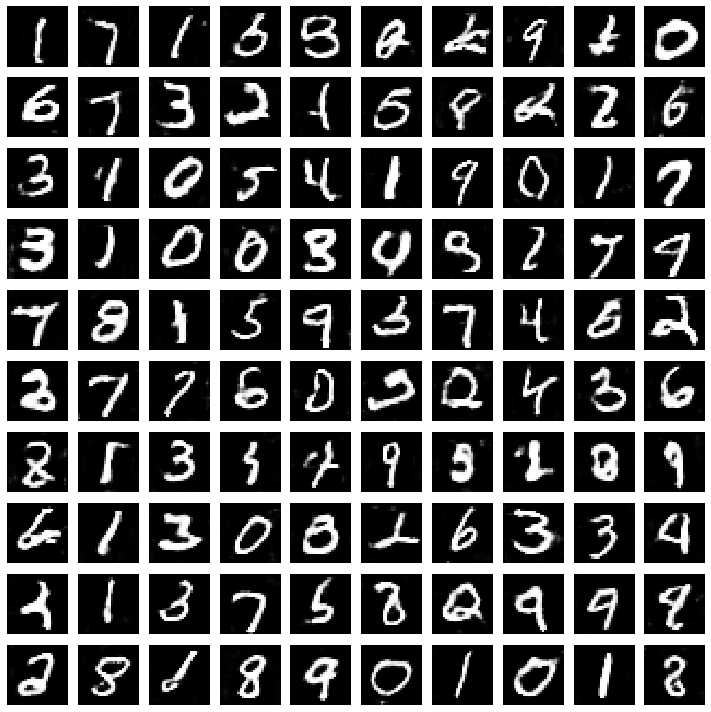

In [10]:
for epoch in range(NUM_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    for step in range(NO_OF_BATCHES):
        #randomly select 50% real images
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
        real_imgs = X_Train[idx]
        
        # generate 50% random images
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        
        # one sided label smoothing
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9 #Label Smoothing, Works well in practice
        fake_y = np.zeros((HALF_BATCH_SIZE,1))
        
        # train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #updates the weights of discriminator
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y) 
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        
        #Train Generator (Complete Model Generator + Frozen Discriminator)
        
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d D loss: %f G loss: %f" % ((epoch + 1), epoch_d_loss, epoch_g_loss))

    if (epoch+1)%10==0:
        generator.save('models/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)
       

    

In [11]:
!ls

images	models	sample_data


In [12]:
!zip -r /content/models.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/gan_generator_30.h5 (deflated 8%)
  adding: content/models/gan_generator_50.h5 (deflated 8%)
  adding: content/models/gan_generator_20.h5 (deflated 8%)
  adding: content/models/gan_generator_40.h5 (deflated 8%)
  adding: content/models/gan_generator_10.h5 (deflated 9%)


In [13]:
from google.colab import files
files.download("/content/models.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

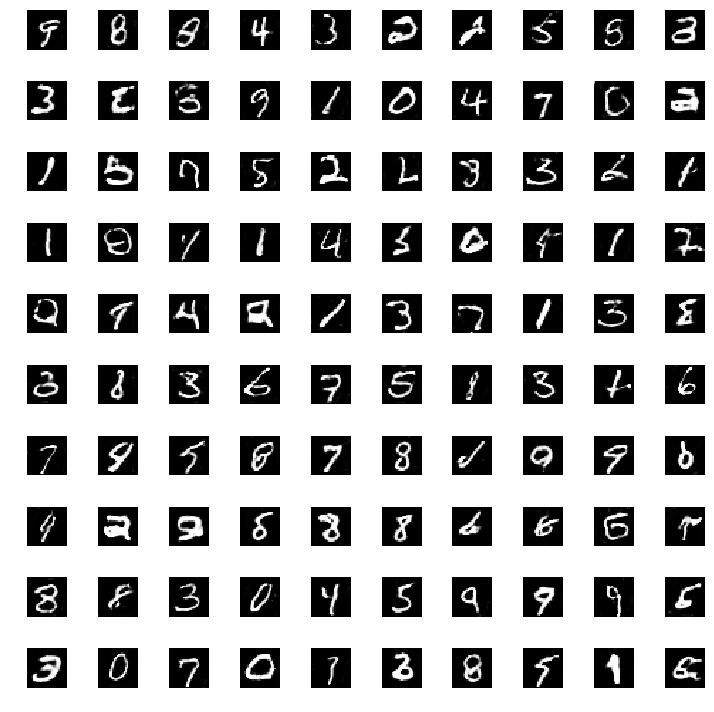

In [ ]:
save_imgs(50)